<a href="https://colab.research.google.com/github/ManuSinghYadav/CS231n/blob/main/Lecture%201%20-%20Implementing%20nearest%20neighbors%20on%20CIFAR-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import torch
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [219]:
Xtr, Ytr = torch.tensor(train_images, dtype=torch.int8), torch.tensor(train_labels, dtype=torch.int8)
Xte, Yte = torch.tensor(test_images, dtype=torch.int8), torch.tensor(test_labels, dtype=torch.int8)

In [220]:
Xtr = Xtr.reshape(50000, -1)
Xte = Xte.reshape(10000, -1)

### Implementing Nearest Neighbors
Find the nearest image (used L1 or Manhatten distance)

In [378]:
class NearestNeighbor:
  def __init__(self, idx):
    self.idx = idx

  def nearest_image(self):
    l1 = abs(Xte[self.idx] - Xtr).sum(1)
    arg_min_image = torch.argmin(l1)

    # Showing Images
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(test_images[self.idx])
    axes[0].set_title('Original Image')
    axes[1].imshow(train_images[arg_min_image])
    axes[1].set_title('Nearest Image')
    plt.tight_layout()
    plt.show()

    return Yte[self.idx].item(), Ytr[arg_min_image].item()

  def accuracy(self):
    c = 0
    for i in range(len(Xte)):
      l1 = abs(Xte[i] - Xtr).sum(1)
      arg_min_image = torch.argmin(l1)
      if Yte[i].item() == Ytr[arg_min_image].item():
        c += 1
    return f"Accuracy is {(c / len(Xte)) * 100}"

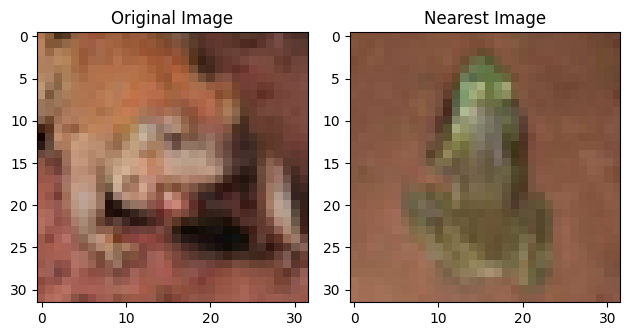

(6, 6)

In [379]:
a = NearestNeighbor(5)
l1 = a.nearest_image()
l1

In [ ]:
a.accuracy()